In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os
import pandas as pd
import numpy as np
from ladybug.epw import EPW
from ladybug.sunpath import Sunpath

import oshe as tc
idd_file = r"C:\openstudio-2.7.0\EnergyPlus\Energy+.idd"

Failed to load paths from C:\Users\tgerrish\Miniconda3\lib\site-packages\honeybee\config.json.
Path to radiance is set to: c:/radiance


# FOR BERLIN METHOD

In [220]:
# Set input file paths

pt_mrt_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\Chamber of Commerce\MRT_2.csv"
pt_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\Chamber of Commerce\points_2.csv"

of_mrt_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\openfield_nh.mrt"
of_utci_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\openfield_nh.utci"
pt_utci_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\Chamber of Commerce\UTCI_2.csv"

epw_file_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\UWG_ARE_AZ_Abu.Dhabi-Bateen.Exec.AP.412160_TMYx_URBAN_02.epw"

idx = pd.date_range(start="2018-01-01 01:00:00", end="2019-01-01 01:00:00", freq="60T", closed="left")


In [221]:
# Load data

# Load epw
epw = EPW(epw_file_path)

# Load points
points = pd.read_csv(pt_path, sep=",").values[:, :3]

# Load open field utci
utci_of = pd.read_csv(of_utci_path, header=None).squeeze().values

# Get climate variables
dbt = np.array(epw.dry_bulb_temperature.values)
rh = np.array(epw.relative_humidity.values)
ws = np.array(epw.wind_speed.values)
hir = np.array(epw.horizontal_infrared_radiation_intensity.values)

# Get point MRT values
mrt = pd.read_csv(pt_mrt_path, index_col=0).set_index(idx)

# Get point UTCI values
utci_loaded = pd.read_csv(pt_utci_path, index_col=0).set_index(idx)

In [222]:
# Generate UTCI object
utci = tc.plot.UTCI(utci_of, utci_loaded.T, points)

Calculating UTCI comfort levels
Calculating UTCI openfield reduction levels


In [225]:
utci.reduction_summary()

,Annual,May,October
07:00 - 10:00,43.470320,51.612903,47.849462
16:00 - 19:00,87.726027,91.612903,94.838710


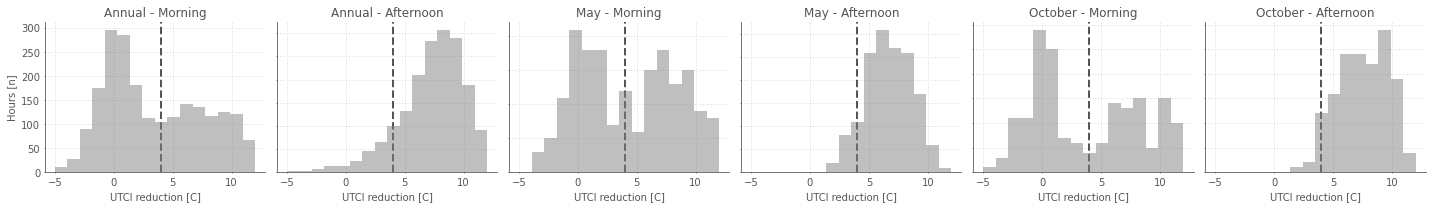

In [219]:
# utci.df_utci_reduction.round(3)
# utci.df_utci.round(3)

import matplotlib.pyplot as plt
tone_color="#555555"

fig, ax = plt.subplots(1, 6, figsize=(20, 3))

for n, (i, [j, k]) in enumerate(varz):
    
    temp_filtered = temp[i]
    temp_filtered.plot(ax=ax[n], kind="hist", bins=np.linspace(-5, 12, 17), density=False, color="grey", alpha=0.5, zorder=4, sharey=True, sharex=True)
    ax[n].axvline(4, zorder=2, ls="--", c=tone_color, lw=2)
    ax[n].grid(zorder=0)
    # Format plot area
    [ax[n].spines[spine].set_visible(False) for spine in ['top', 'right']]
    [ax[n].spines[j].set_color(tone_color) for j in ['bottom', 'left']]
    ax[n].grid(b=True, which='minor', axis='both', c=tone_color, ls=':', lw=0.5, alpha=0.1)
    ax[n].grid(b=True, which='major', axis='both', c=tone_color, ls=':', lw=1, alpha=0.2)
    ax[n].tick_params(which="both", length=1, color=tone_color)
    plt.setp(ax[n].get_xticklabels(), color=tone_color)
    plt.setp(ax[n].get_yticklabels(), color=tone_color)
    ax[n].set_xlabel("UTCI reduction [C]", color=tone_color)
    ax[n].set_ylabel("Hours [n]", color=tone_color)
    ax[n].set_title(j + " - " + k, c=tone_color)
    plt.tight_layout()

# FOR TG METHOD

In [226]:
# Set input file paths

pt_mrt_path = r"C:\Users\tgerrish\Documents\GitHub\oshe\projects\MUNICIPALITY\MUNICIPALITY\result.mrt"
pt_path = r"C:\Users\tgerrish\Documents\GitHub\oshe\projects\MUNICIPALITY\openfield\gridbased_annual\openfield.pts"
pt_utci_path = r"C:\Users\tgerrish\Documents\GitHub\oshe\projects\MUNICIPALITY\MUNICIPALITY\result.utci"

of_mrt_path = r"C:\Users\tgerrish\Documents\GitHub\oshe\projects\MUNICIPALITY\openfield\openfield.mrt"
of_utci_path = r"C:\Users\tgerrish\Documents\GitHub\oshe\projects\MUNICIPALITY\openfield\openfield.utci"

epw_file_path = r"C:\Users\tgerrish\OneDrive - BuroHappold\0045131 Ghadan Future Parks\UWG_ARE_AZ_Abu.Dhabi-Bateen.Exec.AP.412160_TMYx_URBAN_02.epw"
idx = pd.date_range(start="2018-01-01 01:00:00", end="2019-01-01 01:00:00", freq="60T", closed="left")


In [227]:
# Load data

# Load epw
epw = EPW(epw_file_path)

# Load points
points = pd.read_csv(pt_path, sep="\s+").values[:, :3]

# Load open field utci
utci_of = pd.read_csv(of_utci_path, header=0).squeeze().values

# Get climate variables
dbt = np.array(epw.dry_bulb_temperature.values)
rh = np.array(epw.relative_humidity.values)
ws = np.array(epw.wind_speed.values)
hir = np.array(epw.horizontal_infrared_radiation_intensity.values)

# Get point MRT values
mrt = pd.read_csv(pt_mrt_path, index_col=0).set_index(idx)

# Get point UTCI values
utci_loaded = pd.read_csv(pt_utci_path, index_col=0).set_index(idx)

In [228]:
# Generate UTCI object
utci = tc.plot.UTCI(utci_of, utci_loaded.T, points)

Calculating UTCI comfort levels
Calculating UTCI openfield reduction levels


In [229]:
utci.reduction_summary()

,Annual,May,October
07:00 - 10:00,21.689498,32.795699,17.204301
16:00 - 19:00,85.753425,100.000000,93.548387


In [157]:
# Generate summary table metrics for case
threshold = 4
quant = 0.95

varz = [
    [(utci.masks["Annual"] & utci.masks["Morning"]), ["Annual", "Morning"]], 
    [(utci.masks["Annual"] & utci.masks["Afternoon"]), ["Annual", "Afternoon"]], 
    [(utci.masks["May"] & utci.masks["Morning"]), ["May", "Morning"]], 
    [(utci.masks["May"] & utci.masks["Afternoon"]), ["May", "Afternoon"]], 
    [(utci.masks["October"] & utci.masks["Morning"]), ["October", "Morning"]], 
    [(utci.masks["October"] & utci.masks["Afternoon"]), ["October", "Afternoon"]], 
]

# Create the "nth percentile" point
temp = reduction.quantile(quant, axis=1)

# Get the number of hours within specified ranges where threshold reduction is met
d = {
    "Annual": {"Morning": None, "Afternoon": None},
    "May": {"Morning": None, "Afternoon": None},
    "October": {"Morning": None, "Afternoon": None}
}
for i, [j, k] in varz:
    temp_filtered = temp[i]
    d[j][k] = ((temp_filtered >= threshold).sum() / temp_filtered.count())
temp_result = (pd.DataFrame.from_dict(d) * 100).round(1)

temp_result.to_clipboard(header=False, excel=True, index=False)
temp_result

,Annual,May,October
Morning,21.7,32.8,17.2
Afternoon,85.8,100.0,93.5
